# Machine Learning Lifecycle

Machine learning projects are highly iterative; as you progress through the ML lifecycle, you’ll find yourself iterating on a section until reaching a satisfactory level of performance, then proceeding forward to the next task (which may be circling back to an even earlier step)

[<img src="img/lab_05_cycle.png"/>](https://www.jeremyjordan.me/ml-projects-guide/)


Often times, we don't immediately know what the optimal model architecture should be for a given model, and thus we'd like to be able to explore a range of possibilities. **Start simple and gradually ramp up complexity**. This typically involves using a simple model, but can also include starting with a simpler version of your task, and data preparation.

Once you have a general idea of successful model architectures and approaches for your problem, you should now spend much more focused effort on squeezing out performance gains including from the model. That's why we use **pipelines**.



----
So far, we built machine learning models and trained it on some data... now what?

There are still questions that need to be answered like:

* How well is my model doing? Is it a useful model?
* Will training my model on more data improve its performance?
* Do I need to include more features?


# Preprocessing & Feature Engineering


Feature engineering asks: what is the best representation of the sample data to learn a solution to your problem?

It is an art like engineering is an art, like programming is an art, like medicine is an art. There are well defined procedures that are methodical, provable and understood and mainly have two goals:

1. Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
2. Improving the performance of machine learning models.


There are different techniques and steps for preprocessing and feature engineering based on the dataset and/or algorithms.

Here is a list of major feature engineering techniques.

## Scaling

In most cases, the numerical features of the dataset do not have a certain range and they differ from each other.

For example, **age** and **income** don't have the same range in real life, but from the machine learning point of view, we need a way to compare these two columns.

Scaling solves this problem. The continuous features become identical in terms of the range, after a scaling process. This process is not mandatory for many algorithms, but in general, ML models benefit from scaling of the data.

Remeber, if your algorithm is based on **distance** calculations such as k-NN or k-Means need to have scaled continuous features as model input.

* **Normalization**:  is the process of scaling individual samples to have unit norm.

X_new = (X - X_min)/(X_max - X_min)

* **Standardization**: Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with **zero mean and unit variance**.

X_new = (X - mean)/Std

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler

data = [[0, 0], [0, 0], [1, 1], [1, 1], [2, 2]]

scaler = StandardScaler()
scaler.fit(data)
print(f"Original data: {data}")

print(f"Mean: {scaler.mean_}")

print(scaler.transform(data))

Original data: [[0, 0], [0, 0], [1, 1], [1, 1], [2, 2]]
Mean: [0.8 0.8]
[[-1.06904497 -1.06904497]
 [-1.06904497 -1.06904497]
 [ 0.26726124  0.26726124]
 [ 0.26726124  0.26726124]
 [ 1.60356745  1.60356745]]


----
## Imputation

Missing values are one of the most common problems you can encounter when you try to prepare your data for machine learning. The reason for the missing values might be human errors, interruptions in the data flow, privacy concerns, and so on. Whatever is the reason, missing values affect the performance of the machine learning models.

**Dropping missing values**: The most simple solution to the missing values is to drop the rows or the entire column.

**Numerical imputation**: using Mean/Median values. This works by calculating the mean/median of the non-missing **values in** a column and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric data.


**Categorical imputation**: Replacing the missing values with the maximum occurred value in a column is a good option for handling categorical columns.

The above methods don’t factor the correlations between features. It only works on the column level.

**ML-based imputation** for example, **K-NN** uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. This can be very useful in making predictions about the missing values by finding the k’s closest neighbours to the observation with missing data and then imputing them based on the non-missing values in the neighbourhood

In [3]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])

X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


----
## Handling outliers

Many applications require being able to decide whether a new observation belongs to the same distribution as existing observations (it is an inlier), or should be considered as different (it is an outlier). Often, this ability is used to clean real data sets.. Outliers in data can have many causes such as 1-data entry error (human error), 2-Measurement errors (instrument errors), 3- Experimental errors, 4- Data processing errors, 4- Sampling errors, 5. Natural (not an error, novelties in data) and so on.

Usually the best way to detect the outliers is to demonstrate the data visually (Histograms, Scatter plot, box plots, ...). However, if visualization is not possible, there are statistical methods to detect outliers such as:
* Z-Score or Extreme Value Analysis (parametric): The z-score or standard score of an observation is a metric that indicates how many standard deviations a data point is from the sample’s mean, assuming a gaussian distribution.


Often outliers are discarded because of their effect on the total distribution and statistical analysis of the dataset. This is certainly a good approach if the outliers are due to an error of some kind (measurement error, data corruption, etc.), however often the source of the outliers is unclear. There are many situations where occasional ‘extreme’ events cause an outlier that is outside the usual distribution of the dataset but is a valid measurement and not due to an error. In these situations, the choice of how to deal with the outliers is not necessarily clear and the choice has a significant impact on the results of any statistical analysis done on the dataset. The decision about how to deal with outliers depends on the goals and context of the research and should be detailed in any explanation about the methodology.


There are some techniques used to deal with outliers.
* Deleting observations
* Transforming values: Use **robust** transformers
* Separately treating

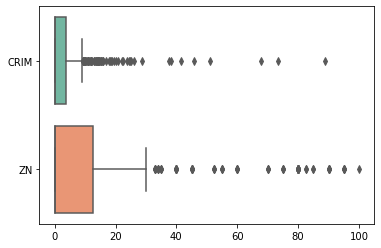

In [4]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns

#Load data
X, y = load_boston(return_X_y=True)

#Create data frame
boston = load_boston()
columns = boston.feature_names
df = pd.DataFrame(X, columns = columns)

ax = sns.boxplot(data=df[['CRIM', 'ZN']], orient="h", palette="Set2")

----
## Binning

The main motivation of binning is to make the model more robust and prevent overfitting, however, it has a cost to the performance. Every time you bin something, you sacrifice information and make your data more regularized.


Binning can be applied on both categorical and numerical data.

In [5]:
df['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

The KBinsDiscretizer can then be used to convert the floating values into fixed number of discrete categories with an ranked ordinal relationship

In [6]:
from sklearn.preprocessing import KBinsDiscretizer  

est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
df['CRIM_binned'] = est.fit_transform(df[['CRIM']])

In [7]:
df['CRIM_binned'].describe()

count    506.000000
mean       1.000000
std        0.818112
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: CRIM_binned, dtype: float64

Another way is to use `Pandas qcut`. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.

In [8]:
df['CRIM_binned_pd'] = pd.qcut(df['CRIM'], 3, labels=False)

In [9]:
df['CRIM_binned_pd'].describe()

count    506.000000
mean       1.000000
std        0.818112
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: CRIM_binned_pd, dtype: float64

-----
## Encoding categorical features

Often features are not given as continuous values but categorical.

**OrdinalEncoder** is used to convert categorical features to such integer codes. This estimator transforms each categorical feature to one new feature of integers (0 to n_categories - 1)


**One-hot encoding** is one of the most common encoding methods in machine learning. This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them. These binary values express the relationship between grouped and encoded column.

This method changes your categorical data, which is challenging to understand for algorithms, to a numerical format and enables you to group your categorical data without losing any information. (For details please see the last part of Categorical Column Grouping)

<img src="img/lab_05_onehot.png"/>

----

In [10]:
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray

# define data
data = asarray([['good'], ['better'], ['best']])
print(data)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)

[['good']
 ['better']
 ['best']]
[[2.]
 [1.]
 [0.]]


In [11]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

[['red']
 ['green']
 ['blue']]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


The problem is that this representation includes redundancy. For example, if we know that [1, 0, 0] represents “blue” and [0, 1, 0] represents “green” we don’t need another binary variable to represent “red“, instead we could use 0 values for both “blue” and “green” alone, e.g. [0, 0].

This is called a **dummy variable encoding**, and always represents C categories with C-1 binary variables.

One-hot encoding/getting dummies Pandas way...

In [12]:
df_data = pd.DataFrame(data)
print(df_data)

       0
0    red
1  green
2   blue


In [13]:
pd.get_dummies(df_data,  drop_first=True)

,0_green,0_red
0,0,1
1,1,0
2,0,0


---
## Interatction/new features

With tabular data, it often means a mixture of aggregating or combining features to create new features, and decomposing or splitting features to create new features.





In [14]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)

print(X)
poly = PolynomialFeatures(2)
poly.fit_transform(X)

poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

[[0 1]
 [2 3]
 [4 5]]


array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

now let's see how we can generate interaction features in a pipeline

In [15]:
# from sklearn.datasets import load_boston
# from sklearn.linear_model import RidgeCV
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split

In [16]:
# boston = load_boston()
# X, y = boston.data, boston.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [53]:
regressor = RidgeCV()
poly = PolynomialFeatures(2, interaction_only=True)

pipe_rfe_poly = make_pipeline(StandardScaler(),
                              poly,
                              regressor
                             )
np.mean(cross_val_score(pipe_rfe_poly, X_train, y_train, cv=5))

0.8875842999570912

----
# Feature Selection

Not all features are created equal. You can objectively estimate the usefulness of features. Feature selection is the process of reducing the number of input variables when developing a predictive model. 


It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

Feature selection algorithms may use a scoring method to rank and choose features, such as correlation or other feature importance methods.

More advanced methods may search subsets of features by trial and error, creating and evaluating models automatically in pursuit of the objectively most predictive sub-group of features.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

np.random.seed(42)

In [19]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

`np.cov()` Estimate a covariance matrix, given data and weights.

Covariance indicates the level to which two variables vary together. If we examine N-dimensional samples, X = [x_1, x_2, ... x_N]^T, then the covariance matrix element C_{ij} is the covariance of x_i and x_j. The element C_{ii} is the variance of x_i.


you can also use `pd.DataFrame.corr()` to compute pairwise correlation of columns.

In probability theory and statistics, the mathematical concepts of `covariance` and `correlation` are very similar. Both describe the degree to which two random variables or sets of random variables tend to deviate from their expected values in similar ways.

> Covariance is when two variables vary with each other, whereas Correlation is when the change in one variable results in the change in another variable.

In [20]:
X_train_scaled = scale(X_train)
cov = np.cov(X_train_scaled, rowvar=False)

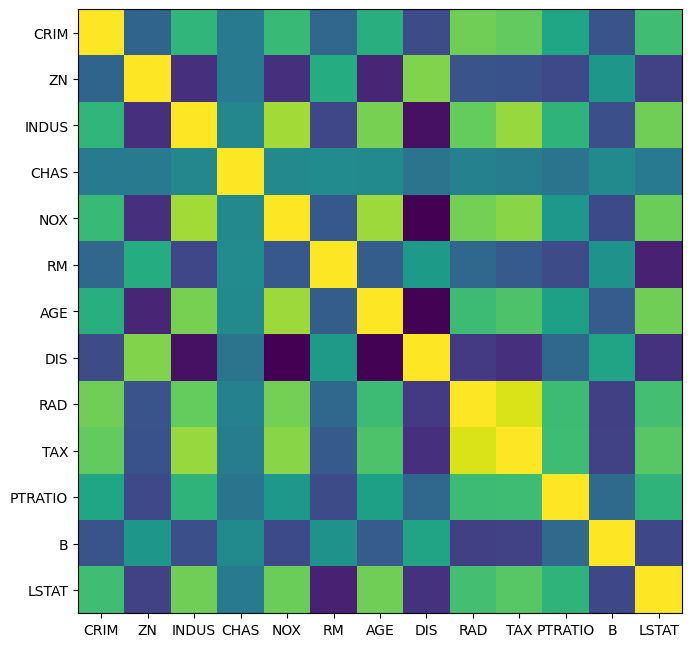

In [21]:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov)
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.yticks(range(X.shape[1]), boston.feature_names);

useful snippet to sort values of your heatmap

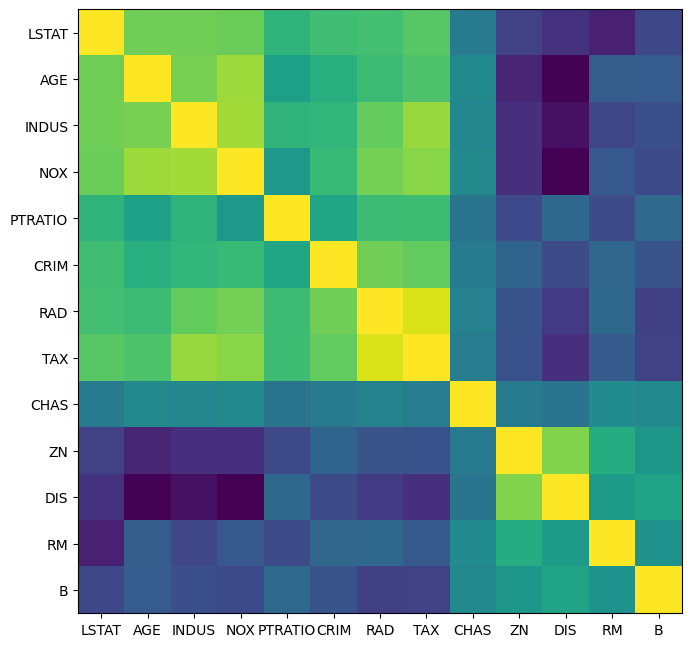

In [22]:
from scipy.cluster import hierarchy
order = np.array(hierarchy.dendrogram(hierarchy.ward(cov), no_plot=True)['ivl'], dtype="int")

plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov[order, :][:, order])
plt.xticks(range(X.shape[1]), boston.feature_names[order])
plt.yticks(range(X.shape[1]), boston.feature_names[order]);

### Supervised feature selection

`f_regression` is a univariate linear regression tests for testing individual effect of each of many regressors. 

This is done in 2 steps:
1. The correlation between each regressor and the target is computed
2. It is converted to an F score then to a p-value.


The **F-test** of overall significance indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables.

An F-test is a type of statistical test that is very flexible. You can use them in a wide variety of settings.


A **p-value** is a measure of the probability that an observed difference could have occurred just by random chance. The lower the p-value, the greater the statistical significance of the observed difference.


If the p-value is less than the significance level, your sample data provide sufficient evidence to conclude that your regression model fits the data better than the model with no independent variables.

In [23]:
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(X, y)

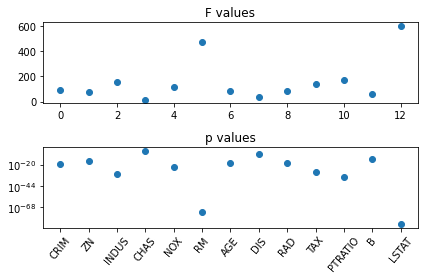

In [24]:
fig, ax = plt.subplots(2, 1)
ax[0].set_title("F values")
ax[0].plot(f_values, 'o')
ax[1].set_title("p values")
ax[1].plot(p_values, 'o')
ax[1].set_yscale("log")

ax[1].set_xticks(range(X.shape[1]))
ax[1].set_xticklabels(boston.feature_names, rotation=50);
fig.tight_layout()

In [25]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFpr
from sklearn.linear_model import RidgeCV

select = SelectKBest(k=2, score_func=f_regression)
select.fit(X_train, y_train)
print(X_train.shape)
print(select.transform(X_train).shape)

(379, 13)
(379, 2)


#### Put it all in a pipeline

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


all_features = make_pipeline(StandardScaler(), RidgeCV())
select_f = make_pipeline(StandardScaler(), 
                       SelectKBest(k=2, score_func=f_regression), 
                       RidgeCV())

In [27]:
print('accuracy with feature selection - F test:')
np.mean(cross_val_score(select_f, X_train, y_train, cv=10))

accuracy with feature selection - F test:


0.6243625749168418

In [28]:
print('accuracy without feature selection:')
np.mean(cross_val_score(all_features, X_train, y_train, cv=10))

accuracy without feature selection:


0.71795885107509

There are many more approaches for feature selection like `VarianceThreshold`, `mutual_info_regression`, and so on...

Let's try `mutual information` and compare it with `F-Test`.

**mutual information** is one of many quantities that measures how much one random variables tells us about another. It is a dimensionless quantity with (generally) units of bits, and can be thought of as the reduction in uncertainty about one random variable given knowledge of another.

F-test captures only linear dependency. On the other hand, mutual information can capture any kind of dependency between variables.

In [29]:
from sklearn.feature_selection import mutual_info_regression

select_mi = make_pipeline(StandardScaler(), 
                       SelectKBest(k=2, score_func=mutual_info_regression), 
                       RidgeCV())

In [30]:
print('accuracy with feature selection - mutual information:')
np.mean(cross_val_score(select_mi, X_train, y_train, cv=10))

accuracy with feature selection - mutual information:


0.5894349088628791

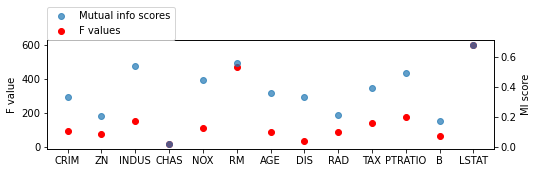

In [31]:
# compare MI score and F values

scores = mutual_info_regression(X_train, y_train)

fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(f_values, 'o', c='r')
plt.ylabel("F value")
ax2 = plt.twinx()
line_s, = ax2.plot(scores, 'o', alpha=.7)
ax2.set_ylabel("MI score")
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["Mutual info scores", "F values"], loc=(0, 1))

### Recursive feature elimination

recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [32]:
from sklearn.feature_selection import RFECV

regressor = RidgeCV()
rfecv = RFECV(estimator=regressor, step=1, cv=5,
              scoring='r2')

rfecv_pipe = make_pipeline(StandardScaler(),
                         rfecv)

rfecv_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('rfecv',
                 RFECV(cv=5,
                       estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])),
                       scoring='r2'))])

Optimal number of features : 13


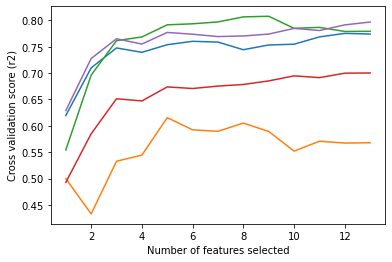

In [33]:
print("Optimal number of features : %d" % rfecv_pipe['rfecv'].n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")
plt.plot(range(1, len(rfecv_pipe['rfecv'].grid_scores_) + 1), rfecv_pipe['rfecv'].grid_scores_)
plt.show()

note: 𝑅2  is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line

#### Remeber Lasso regression?

In [34]:
from sklearn.linear_model import LassoCV


lasso_pipe = make_pipeline(StandardScaler(),
                         LassoCV())
lasso_pipe.fit(X_train, y_train)

print(lasso_pipe['lassocv'].coef_)

[-0.8827688   0.94452435 -0.0877915   0.58901443 -1.67730936  2.64640135
 -0.14442202 -2.78038351  1.67056079 -1.59143582 -2.12859861  0.71729559
 -3.60974068]


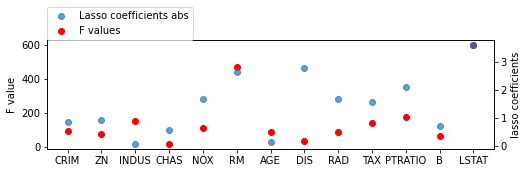

In [35]:
fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(f_values, 'o', c='r')
plt.ylabel("F value")
ax2 = plt.twinx()
ax2.set_ylabel("lasso coefficients")
line_s, = ax2.plot(np.abs(lasso_pipe['lassocv'].coef_), 'o', alpha=.7)
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["Lasso coefficients abs", "F values"], loc=(0, 1))

# Hyperparameter Tuning

A model **hyperparameter** is a configuration that is external to the model and whose value cannot be estimated from data.

* They are often used in processes to help estimate model parameters.
* They are often specified by the practitioner.
* They can often be set using heuristics.
* They are often tuned for a given predictive modeling problem.

Hyperparameters address model design questions such as:
* K in K-NN
* What should be the maximum depth allowed for my decision tree?
* How many trees should I include in my random forest?
* How many layers should I have in my neural network?


We cannot know the best value for a model hyperparameter on a given problem. We may use rules of thumb, copy values used on other problems, or search for the best value by trial and error.

[<img src="img/lab_06_hpt.png"/>](https://www.analyticsvidhya.com/blog/2021/04/evaluating-machine-learning-models-hyperparameter-tuning/)

-----
Searching for the best hyper-parameter can be tedious, hence search algorithms like **grid search** or **random search**. USing these, you are tuning the hyperparameters of the model in order to discover the parameters of the model that result in the most skillful predictions.

Use **coarse-to-fine random searches** for hyperparameters. Start with a wide hyperparameter space initially and iteratively hone in on the highest-performing region of the hyperparameter space.

Please note that optimal hyperparameters often differ for different datasets and models.

A search consists of:

* an estimator (regressor or classifier such as sklearn.svm.SVC());
* a parameter space;
* a method for searching or sampling candidates;
* a cross-validation scheme; and
* a score function.


In [36]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split


data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

In [37]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.

# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=100, tol=0.1)

pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('logreg', logistic)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'logreg__C': np.logspace(-4, 4, 4),
    'logreg__penalty':['l2', 'l1'],
    'logreg__class_weight':['balanced', 'none']
    
}
search = GridSearchCV(pipe, 
                      param_grid,
                      scoring='f1_macro',
                      cv=5,
                      n_jobs=-1
                     )

search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.982):
{'logreg__C': 0.046415888336127774, 'logreg__class_weight': 'balanced', 'logreg__penalty': 'l2'}


In [38]:
y_pred = search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        53
           1       0.96      0.97      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [39]:
search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.046415888336127774,
                                    class_weight='balanced', tol=0.1))])

In [40]:
new_lr = search.best_estimator_['logreg']
new_lr.fit(X_train, y_train)

y_pred = new_lr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        53
           1       0.95      0.93      0.94        90

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



# Model Evaluation

Establish performance baselines on your problem. Baselines are useful for both establishing a lower bound of expected performance (simple model baseline) and establishing a target performance level (human baseline).

* Simple baselines include out-of-the-box scikit-learn models (i.e. logistic regression with default parameters) or even simple heuristics (always predict the majority class). Without these baselines, it's impossible to evaluate the value of added model complexity.
* If your problem is well-studied, search the literature to approximate a baseline based on published results for very similar tasks/datasets.
* If possible, try to estimate human-level performance on the given task. Don't naively assume that humans will perform the task perfectly, a lot of simple tasks are deceptively hard!

## Why is my model performing poorly?

There a many reasons why your model is not performing as you like it.

* Implementation bugs
* Hyperparameter choices
* Data/model fit
* Dataset construction


### Train/Test split

First step to properly evaluate your model is to not train the model on the entire dataset. I repeat: **do not train the model on the entire dataset.**


<img src="img/lab_05_split.png"/>

The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.


----

## Metrics

There are a variety of metrics you can use to evaluate your regression, clssification, and clustering models. You can read about many of them [here](https://scikit-learn.org/stable/modules/model_evaluation.html)

### Regression metrics

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

* Mean Squared Error (MSE).

<img src="img/lab_06_mse.png" style="width: 200px;"/>

The squaring  has the effect of inflating or magnifying large errors. That is, the larger the difference between the predicted and expected values, the larger the resulting squared positive error. This has the effect of “punishing” models more for larger errors when MSE is used as a loss function. It also has the effect of “punishing” models by inflating the average error score when used as a metric.

>1.0, 1.0 = 0.000
>1.0, 0.9 = 0.010
>1.0, 0.8 = 0.040
>1.0, 0.7 = 0.090
>1.0, 0.6 = 0.160
>1.0, 0.5 = 0.250
>1.0, 0.4 = 0.360
>1.0, 0.3 = 0.490
>1.0, 0.2 = 0.640
>1.0, 0.1 = 0.810
>1.0, 0.0 = 1.000


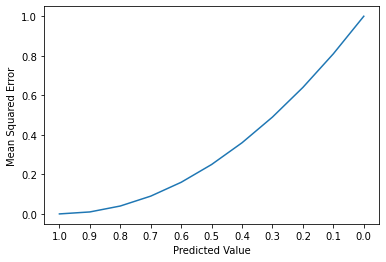

In [41]:
# example of increase in mean squared error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# predicted value
predicted = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
# calculate errors
errors = list()
for i in range(len(expected)):
    # calculate error
    err = mean_squared_error([expected[i]], [predicted[i]])
    # store error
    errors.append(err)
    print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

---
* Root Mean Squared Error (RMSE): is an extension of the mean squared error.

Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted. For example, if your target variable has the units “dollars,” then the RMSE error score will also have the unit “dollars” and not “squared dollars” like the MSE.

In [42]:
from sklearn.metrics import mean_squared_error

mean_squared_error(expected, predicted, squared=False)

0.5916079783099616

---
* Mean Absolute Error (MAE): is a popular metric because, like RMSE, the units of the error score match the units of the target value that is being predicted. Unlike the RMSE, the changes in MAE are linear and therefore intuitive.

<img src="img/lab_06_mae.png" style="width: 200px;"/>

As its name suggests, the MAE score is calculated as the average of the absolute error values. Absolute or abs() is a mathematical function that simply makes a number positive. Therefore, the difference between an expected and predicted value may be positive or negative and is forced to be positive when calculating the MAE.

The main problem with the F1 score is that it gives equal weight to precision and recall. We might sometimes need to include domain knowledge in our evaluation where we want to have more recall or more precision.


* **R Squared / Coefficient of Determination**

is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted.

R-square is a comparison of residual sum of squares (SSres) with total sum of squares(SStot). Total sum of squares is calculated by summation of squares of perpendicular distance between data points and the average line.

A residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.

<img src="img/lab_06_r2.jpeg" style="width: 600px;"/>


#### Residual plots

A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis. The figure below is a good example of how a typical residual plot looks like.

<img src="img/lab_06_residual.png"/>

Every regression model inherently has some degree of error since you can never predict something 100% accurately. More importantly, randomness and unpredictability are always a part of the regression model. Hence, a regression model can be explained as:

`Response = Deterministic + Stochastic`

The deterministic part of the model is what we try to capture using the regression model. Ideally, our linear equation model should accurately capture the predictive information. Essentially, what this means is that if we capture all of the predictive information, all that is left behind (residuals) should be completely random & unpredictable i.e stochastic. Hence, we want our residuals to follow a normal distribution.

<img src="img/lab_06_residual_projected.png"/>

**In a good residual plot, we do not see any patterns in the value of the residuals as we move along the x-axis.**

---
### Classification metrics


<img src="img/lab_06_tf_tn.png" style="width: 400px;"/>


* **Accuracy**

Accuracy is the quintessential classification metric. It is pretty easy to understand. And easily suited for binary as well as a multiclass classification problem.

`Accuracy = (TP+TN)/(TP+FP+FN+TN)`

Accuracy is the proportion of true results among the total number of cases examined.

When the target class is very sparse (think rare events like if an astroid will hit the earth), accuracy is not a good choice.

* **Precision**

Precision tells us the the proportion of predicted Positives is truly Positive

`Precision = (TP)/(TP+FP)`

In the asteroid prediction problem, we never predicted a true positive.
And thus precision=0

Precision is a good evaluation metric to use when the **cost of a false positive is very high and the cost of a false negative is low**. For example, precision is good to use if you are a restaurant owner looking to buy wine for your restaurant only if it is predicted to be good by a classifier algorithm.

* **Recall**
 
 Recall answers a different question: what proportion of actual Positives is correctly classified?

`Recall = (TP)/(TP+FN)`

In the asteroid prediction problem, we never predicted a true positive.
And thus recall is also equal to 0.

Recall is a valid choice of evaluation metric when we want to capture as many positives as possible. For example: If we are building a system to predict if a person has cancer or not, we want to capture the disease even if we are not very sure.

However having a high recall doesn’t necessary mean a model is good. For example, if a model predicted that everyone had a disease, the model would have a perfect recall but it would have a lot of false positives and be telling people they were sick when they were not.


<img src="img/lab_06_pr.png" style="width: 400px;"/>


* **F1 Score**

The F1 score is a number between 0 and 1 and is the harmonic mean of precision and recall.

<img src="img/lab_06_f1.png"/>


F1 score maintains a balance between the precision and recall for your classifier. If your precision is low, the F1 is low and if the recall is low again your F1 score is low.


----
There are more classifacation metrics like Log Loss and Binary Crossentropy which we will see in Neural Networks section of the course.



#### Beware not to use a regression scoring function with a classification problem, you will get useless results.

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [44]:
data.data.shape

(569, 30)

In [45]:
from sklearn.metrics import confusion_matrix

# print(confusion_matrix(y_test, y_pred))
print(lr.score(X_test, y_test))

0.9230769230769231


In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        53
           1       0.94      0.93      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



----
### Precision Recall Curve


The Precision-Recall curves is used for evaluating the performance of binary classification algorithms. It summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability **thresholds**.

For example, if we use logistic regression, the threshold would be the predicted probability of an observation belonging to the positive class. Normally in logistic regression, if an observation is predicted to belong to the positive class at probability > 0.5, it is labeled as positive. However, we could really choose any probability threshold between 0 and 1. A precision-recall curve helps to visualize how the choice of threshold affects classifier performance, and can even help us select the best threshold for a specific problem.

Precision-Recall is a useful measure of success of prediction when the classes are very **imbalanced**.

In [47]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

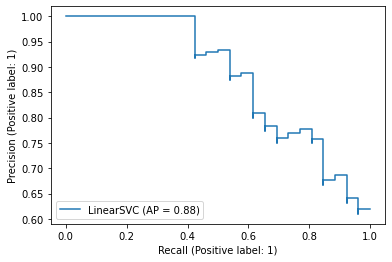

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)

we can summarize the information in a precision-recall curve with a single value. This summary metric is the **AUC-PR**. AUC-PR stands for area under the (precision-recall) curve. Generally, the higher the AUC-PR score, the better a classifier performs for the given task.

In a perfect classifier, AUC-PR =1. In a “baseline” classifier, the AUC-PR will depend on the fraction of observations belonging to the positive class. For example, in a balanced binary classification data set, the “baseline” classifier will have AUC-PR = 0.5. A classifier that provides some predictive value will fall between the “baseline” and perfect classifiers.

----
### AUC-ROC Curve

AUC ROC indicates how well the probabilities from the positive classes are separated from the negative classes.

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

Where True positive rate or TPR is just the proportion of trues we are capturing using our algorithm.
`Sensitivty = TPR(True Positive Rate)= Recall = TP/(TP+FN)`

and False positive rate or FPR is just the proportion of false we are capturing using our algorithm.

`1- Specificity = FPR(False Positive Rate)= FP/(TN+FP)`



A ROC curve is constructed by plotting the true positive rate (TPR) against the false positive rate (FPR).

Is appropriate when the observations are balanced between each class
 As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
 
 
 we can use the ROC curves to decide on a Threshold value.
The choice of threshold value will also depend on how the classifier is intended to be used.

Whenever you apply a classifier to assign a label against an observation, the classifier generates a probability against the observation and not the label. The probability is the indicator of how confidently you can assign a label against the observation and then after comparing it with a preset threshold value you assign the label to it. If you relax your threshold to a lower value, your test observations will have more number of readers labeled as Yes. The controlling threshold depends on the use case. For example, in the advertisement industry, your goal is to capture the maximum number of people who will click on the ad. Therefore, you can relax your threshold while predicting so that you can target more people.

ROC or Receiver Operator Characteristic curve is a plot of the Recall (True Positive Rate) (on the y-axis) versus the False Positive Rate (on the x-axis) for every possible classification threshold.

The reason why you should check the ROC curve to evaluate a classifier instead of a simpler metric such as accuracy is that a ROC curve visualizes all possible classification thresholds, whereas accuracy only represents performance for a single threshold. Typical ROC curve looks like the image shown below:

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


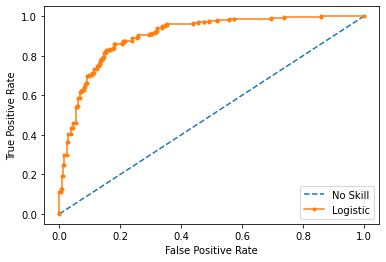

In [49]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

---
### Imbalanced data


As discussed, imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed. The distribution can vary from a slight bias to a severe imbalance where there is one example in the minority class for hundreds, thousands, or millions of examples in the majority class or classes.

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class.

This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

There are techniques to handle imbalanced data, including:

* Collecting more data!
* Using the right evaluation metrics: F1 vs Accuracy
* Resampling training set
    - undersampling: balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. 
    - oversampling: oversampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. 
* Trying different algorithms

In [50]:
from collections import Counter

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

print(__doc__)

RANDOM_STATE = 42

# Create a folder to fetch the dataset
iris = load_iris()
X, y = make_imbalance(
    iris.data,
    iris.target,
    sampling_strategy={0: 25, 1: 50, 2: 50},
    random_state=RANDOM_STATE,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Automatically created module for IPython interactive environment
Training target statistics: Counter({1: 38, 2: 38, 0: 17})
Testing target statistics: Counter({1: 12, 2: 12, 0: 8})


In [51]:
# Create a pipeline WITHOUT resampling
pipeline = make_pipeline(
    StandardScaler(), 
    LogisticRegression(random_state=RANDOM_STATE)
)
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))


                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00         8
          1       0.92      0.92      0.95      0.92      0.93      0.87        12
          2       0.92      0.92      0.95      0.92      0.93      0.87        12

avg / total       0.94      0.94      0.96      0.94      0.95      0.90        32



In [52]:
# Create a pipeline WITH resampling
pipeline = make_pipeline(
    RandomUnderSampler(sampling_strategy='auto', random_state=42),
    StandardScaler(), 
    LogisticRegression(random_state=RANDOM_STATE)
)
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00         8
          1       0.92      1.00      0.95      0.96      0.97      0.95        12
          2       1.00      0.92      1.00      0.96      0.96      0.91        12

avg / total       0.97      0.97      0.98      0.97      0.97      0.95        32



---
### Clustering metrics


In clustering you don’t have any labels, just a set of features for observation and your goal is to create clusters that have similar observations clubbed together and dissimilar observations kept as far as possible.

Evaluating the performance of a clustering algorithm is not as trivial as counting the number of errors or the precision and recall like in the case of supervised learning algorithms.

Here clusters are evaluated based on some similarity or dissimilarity measure such as the distance between cluster points. If the clustering algorithm separates dissimilar observations apart and similar observations together, then it has performed well. The One of the most popular metrics evaluation metrics for clustering algorithms is the **Silhouette coefficient**.

The Silhouette Coefficient is defined for each sample and is composed of two scores:
* a: The mean distance between a sample and all other points in the same cluster.
* b: The mean distance between a sample and all other points in the next nearest cluster.

<img src="img/lab_06_sc.png"/>


The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample. The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

Check sklearn for an example.

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html